In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df=pd.read_csv("delhi_aqi (1).csv")
df.head()

,date,co,no,no2,o3,so2,PM2.5,pm10,nh3
0,25-11-2020 01:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,25-11-2020 02:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,25-11-2020 03:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,25-11-2020 04:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,25-11-2020 05:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
df.dtypes

date      object
co       float64
no       float64
no2      float64
o3       float64
so2      float64
PM2.5    float64
pm10     float64
nh3      float64
dtype: object

In [ ]:
df.shape

(18776, 9)

In [ ]:
cols = [col for col in df.columns if col != 'date']
df[cols] = df[cols].fillna(df[cols].median())

In [ ]:
df.shape

(18776, 9)

In [ ]:
# convert "Date" column to datetime object
df['Date'] = pd.to_datetime(df['date'])

# create new columns for day, month, and year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head()

,date,co,no,no2,o3,so2,PM2.5,pm10,nh3,Date,Day,Month,Year
0,25-11-2020 01:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25 01:00:00,25,11,2020
1,25-11-2020 02:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25 02:00:00,25,11,2020
2,25-11-2020 03:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25 03:00:00,25,11,2020
3,25-11-2020 04:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25 04:00:00,25,11,2020
4,25-11-2020 05:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25 05:00:00,25,11,2020


In [ ]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 date     0
co       0
no       0
no2      0
o3       0
so2      0
PM2.5    0
pm10     0
nh3      0
Date     0
Day      0
Month    0
Year     0
dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')
df.head()

,date,co,no,no2,o3,so2,PM2.5,pm10,nh3,Date,Day,Month,Year
0,25-11-2020 01:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,11-25-2020,25,11,2020
1,25-11-2020 02:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,11-25-2020,25,11,2020
2,25-11-2020 03:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,11-25-2020,25,11,2020
3,25-11-2020 04:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,11-25-2020,25,11,2020
4,25-11-2020 05:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,11-25-2020,25,11,2020


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   PM2.5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
 9   Date    18776 non-null  object 
 10  Day     18776 non-null  int64  
 11  Month   18776 non-null  int64  
 12  Year    18776 non-null  int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 1.9+ MB


<Axes: >

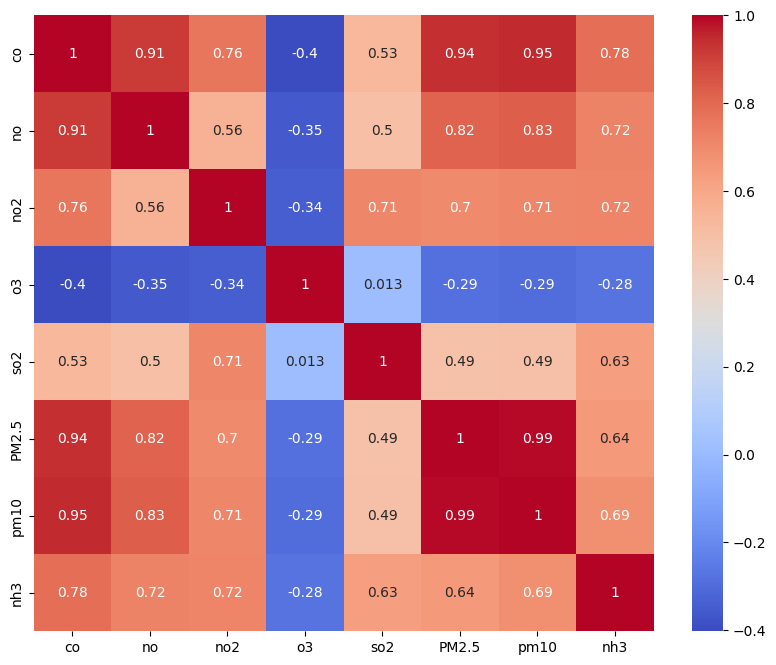

In [ ]:
# drop columns to exclude from correlation matrix
cols_to_exclude = ['Date', 'Day', 'Month', 'Year', 'date']
corr_df = df.drop(cols_to_exclude, axis=1)

# calculate correlation matrix
corr_matrix = corr_df.corr()

# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


ValueError: ignored

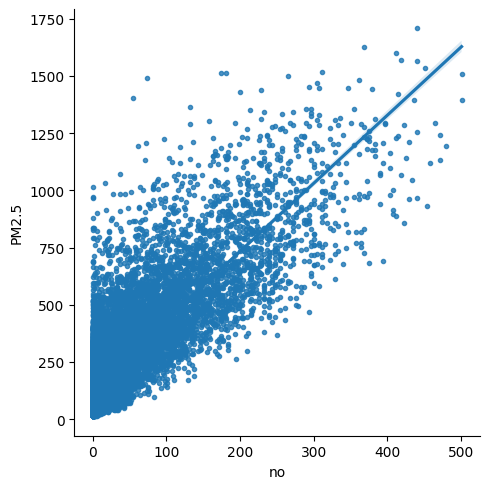

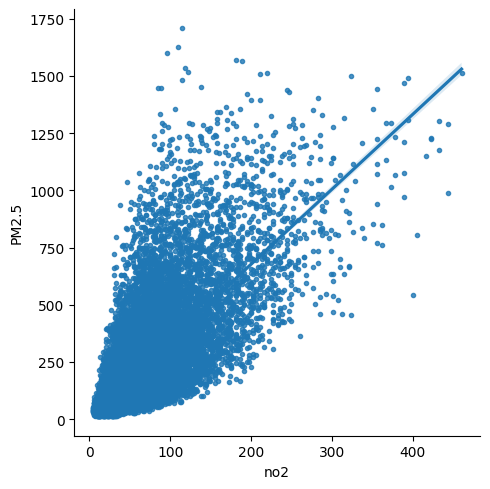

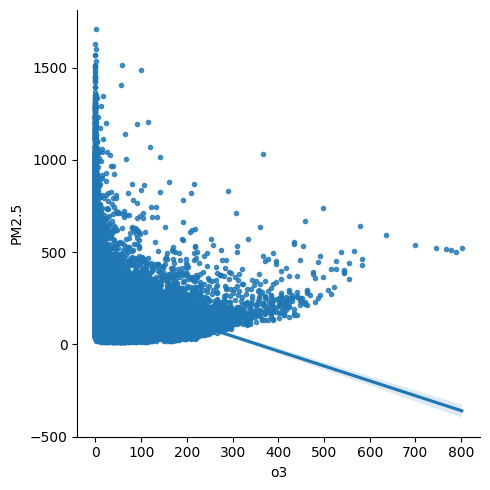

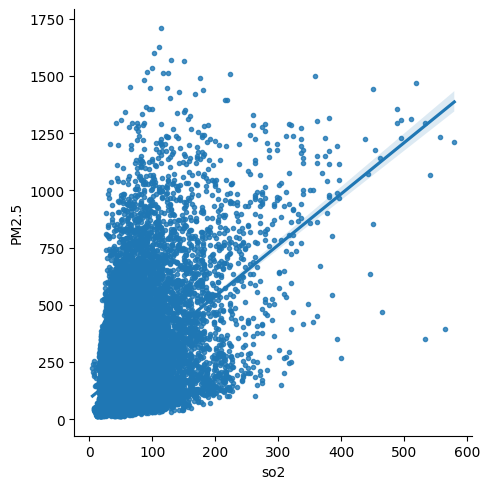

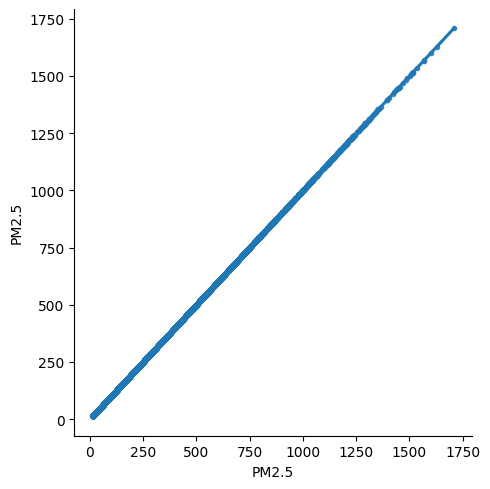

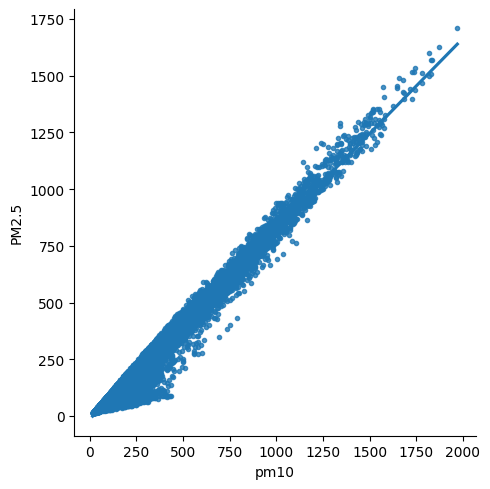

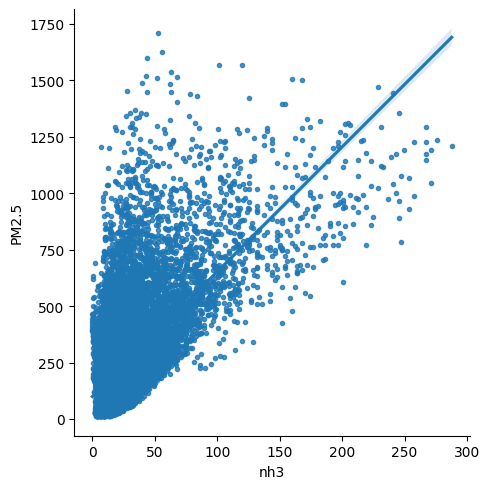

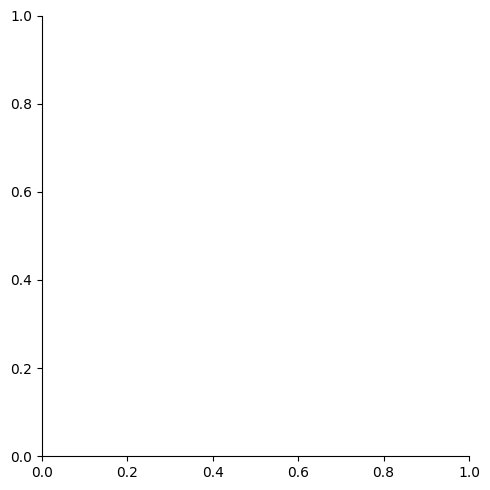

In [ ]:
#plot all X-features against output variable PM2.5
import seaborn as sns

col_ = df.columns.tolist()[2:]
for i in col_:
    sns.lmplot(x=i, y='PM2.5', data=df, markers='.')


In [ ]:
X = df[['co', 'no', 'no2', 'o3', 'so2', 'pm10', 'nh3']]
y = df['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Random Forest Regression**

In [ ]:
# Initialize the random forest regressor with 100 trees
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the regressor to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 309.92147068081755
Root Mean Squared Error: 17.604586637601507
Mean Absolute Error: 10.753163977635781
R-squared: 0.9937714488013748


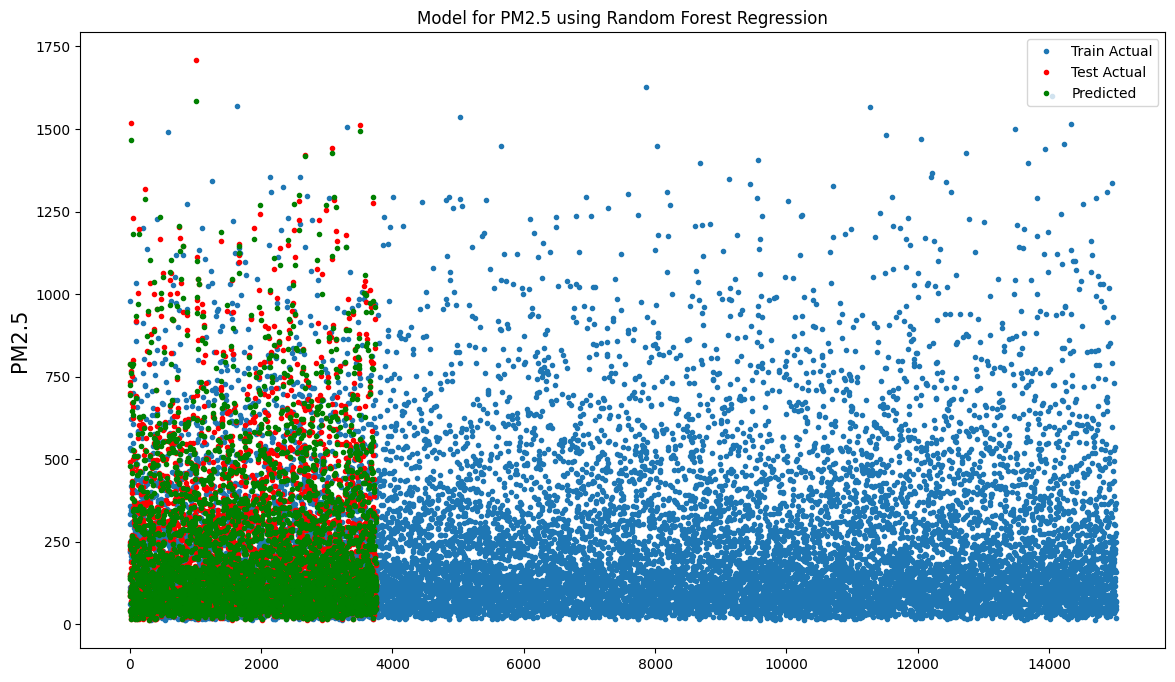

In [ ]:
# Plot actual and predicted values for Random Forest
plt.figure(figsize=(14,8))
plt.title("Model for PM2.5 using Random Forest Regression")
#plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM2.5",fontsize=15)
plt.plot(y_train.values,'.', label='Train Actual')
plt.plot(y_test.values, 'r.',label='Test Actual')
plt.plot(y_pred,'g.', label='Predicted')
plt.legend()
plt.show()

#**Decision Tree Regression**

In [ ]:
# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_regressor.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 612.4671615814697
Root Mean Squared Error: 24.74807389639585
Mean Absolute Error: 14.72910809371672
R-squared: 0.9876911300627003


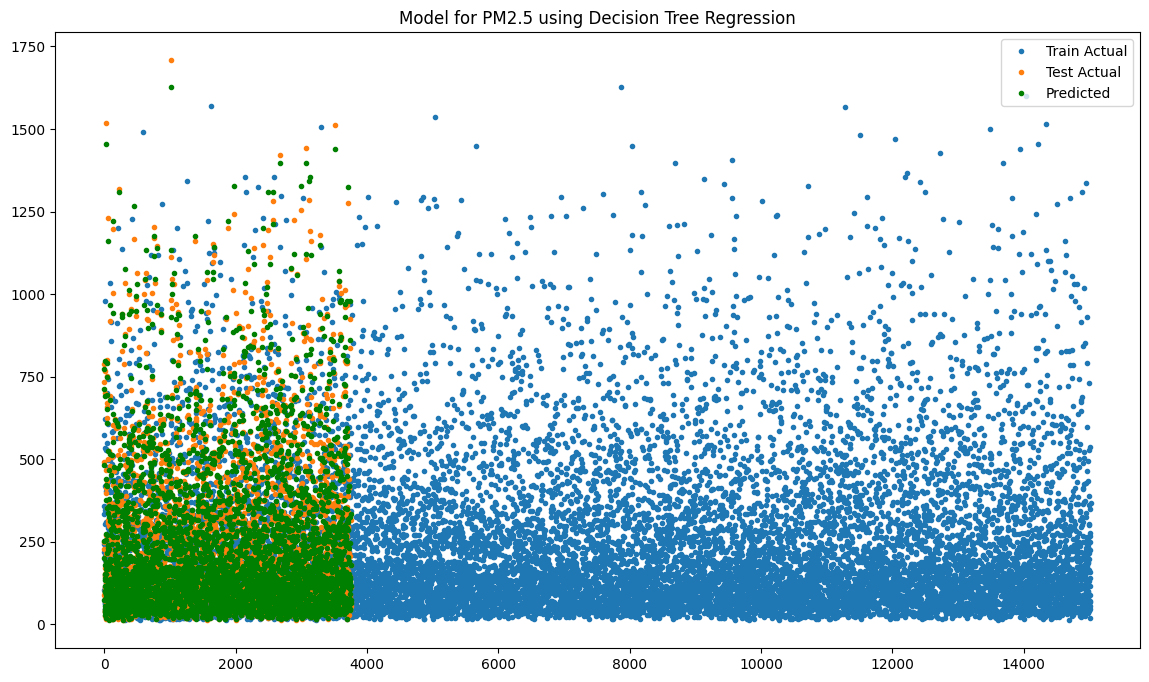

In [ ]:
# Plot actual and predicted values for Decision Tree
plt.figure(figsize=(14,8))
plt.plot(y_train.values, '.', label='Train Actual')
plt.plot(y_test.values,'.', label='Test Actual')
plt.plot(y_pred,'g.', label='Predicted')
plt.legend()
plt.title('Model for PM2.5 using Decision Tree Regression')
#plt.xlabel("Date", fontsize = 15)
plt.show()

#**Elastic Net Regression**

In [ ]:
# fit the Elastic Net model
model = ElasticNet(alpha=0.1, l1_ratio=0.55, max_iter=10000)
model.fit(X_train, y_train)

# make predictions on train and test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 883.7550648557404
Root Mean Squared Error: 29.728018179080497
Mean Absolute Error: 19.67054159476188
R-squared: 0.9822390050731035


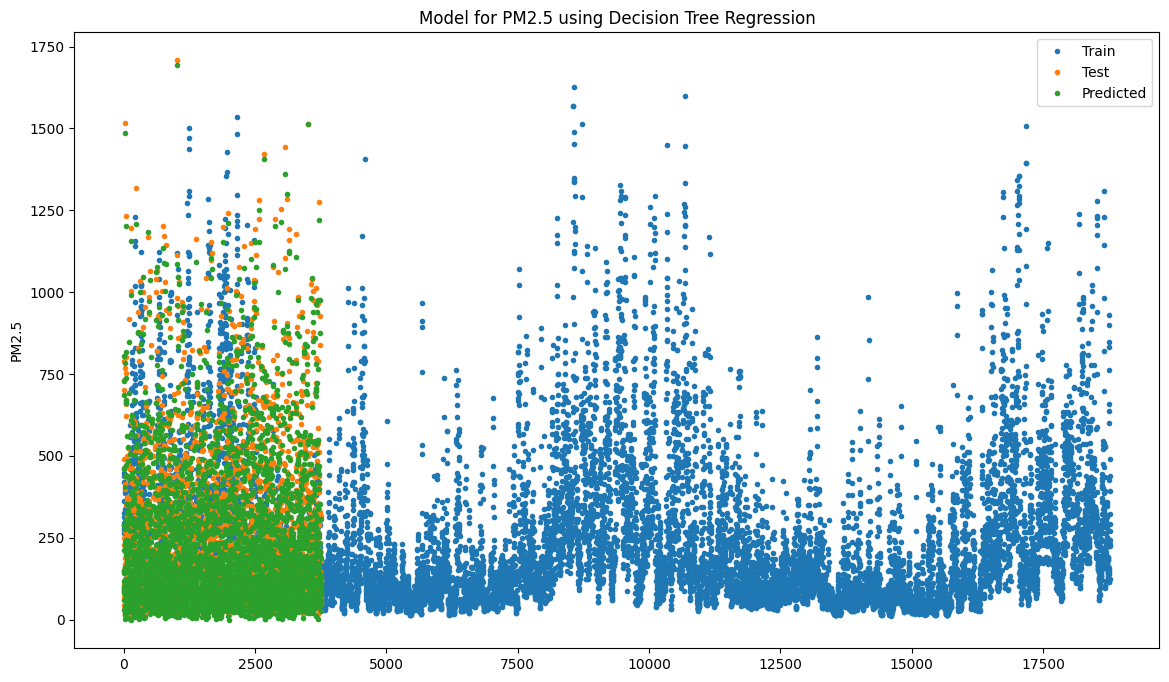

In [ ]:
# plot the line plot with train, test, and predicted values
plt.figure(figsize=(14,8))
plt.plot(y_train, '.', label='Train')
plt.plot(y_test.values, '.', label='Test')
plt.plot(y_pred, '.', label='Predicted')
plt.legend()
plt.title('Model for PM2.5 using Decision Tree Regression')
plt.ylabel('PM2.5')
plt.show()

#**Lasso Regression**

In [ ]:
# Create Lasso regression model
lasso = Lasso(alpha=0.01)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Predict the PM2.5 values for the testing set
y_pred = lasso.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 883.7769925381526
Root Mean Squared Error: 29.72838698177472
Mean Absolute Error: 19.671248386821812
R-squared: 0.9822385643882672


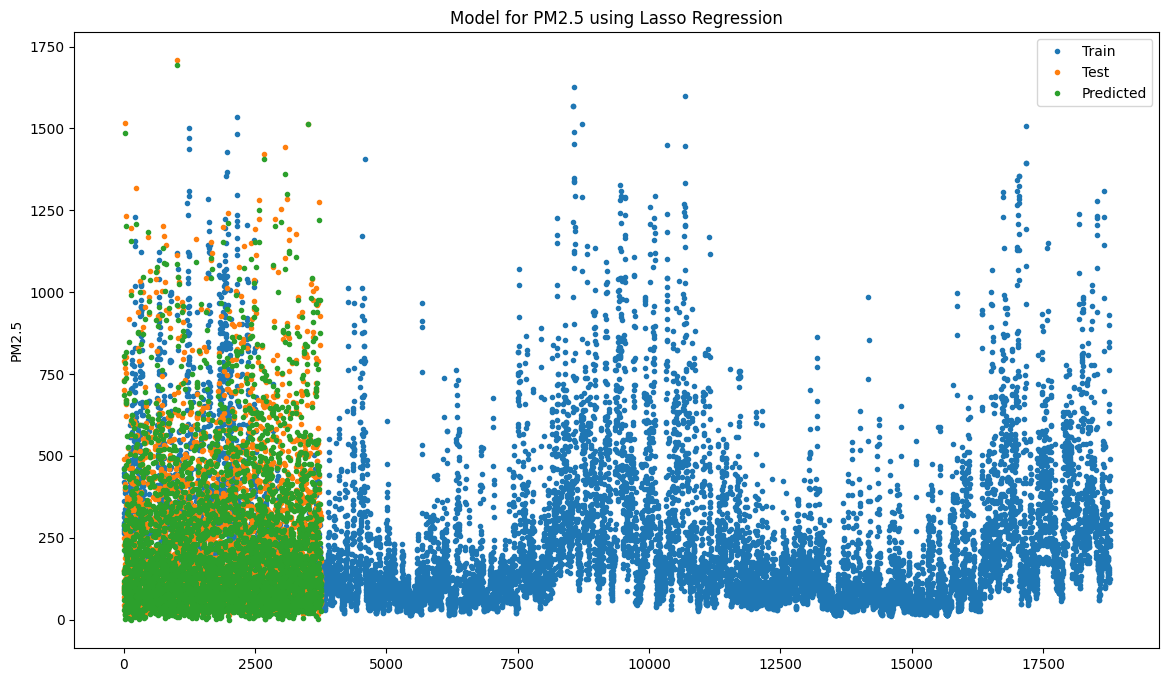

In [ ]:
# Plot the predicted and actual PM2.5 values for the testing set
plt.figure(figsize=(14,8))
plt.plot(y_train,'.', label="Train")
plt.plot(y_test.values,'.', label='Test')
plt.plot(y_pred ,'.',label='Predicted')
plt.legend()
plt.title('Model for PM2.5 using Lasso Regression')
plt.ylabel('PM2.5')
plt.show()

# Ridge Regression

In [ ]:
# create and fit Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Predict the PM2.5 values for the testing set
y_pred = ridge.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 883.7802410413991
Root Mean Squared Error: 29.72844161811041
Mean Absolute Error: 19.671364193424072
R-squared: 0.9822384991024747


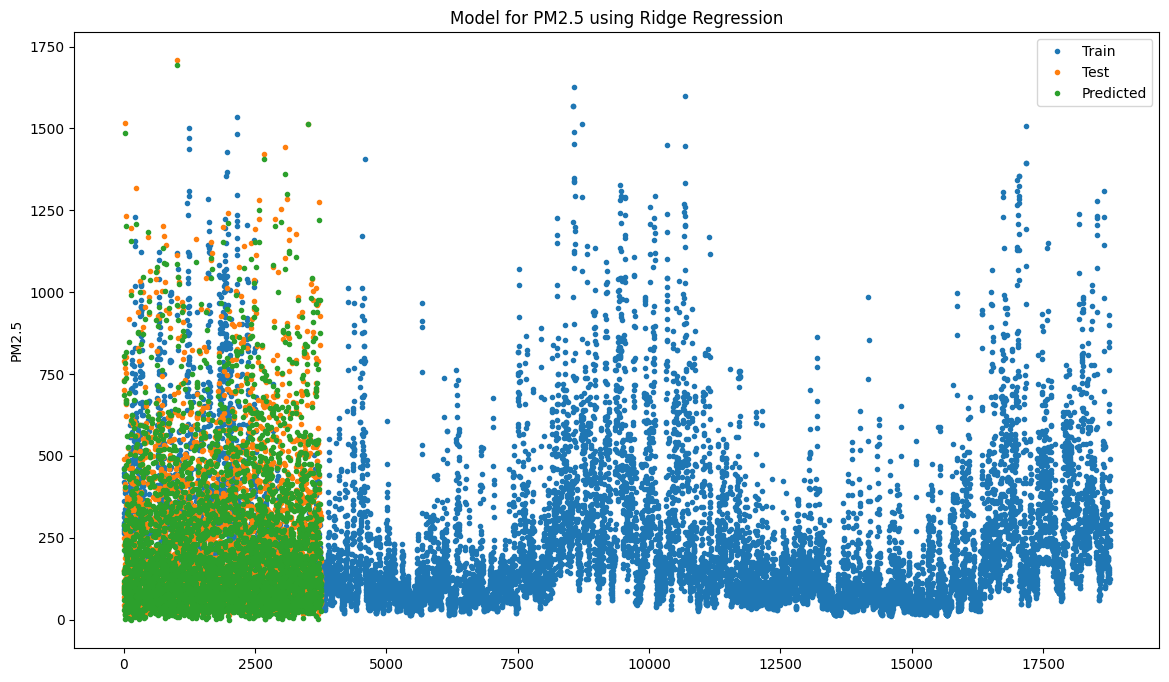

In [ ]:
# plot line plot of train, test, and predicted values
plt.figure(figsize=(14,8))
plt.plot(y_train, '.', label='Train')
plt.plot(y_test.values, '.', label='Test')
plt.plot(y_pred, '.', label='Predicted')
plt.legend()
plt.title('Model for PM2.5 using Ridge Regression')
plt.ylabel('PM2.5')
plt.show()

#**SVR**

In [ ]:
# Initialize and train the SVR model
svr = SVR()
svr.fit(X_train, y_train)

# Predict the PM2.5 values for the testing set
y_pred = svr.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 8551.31153964038
Root Mean Squared Error: 92.47330176672821
Mean Absolute Error: 55.89749531006496
R-squared: 0.8281426529661172


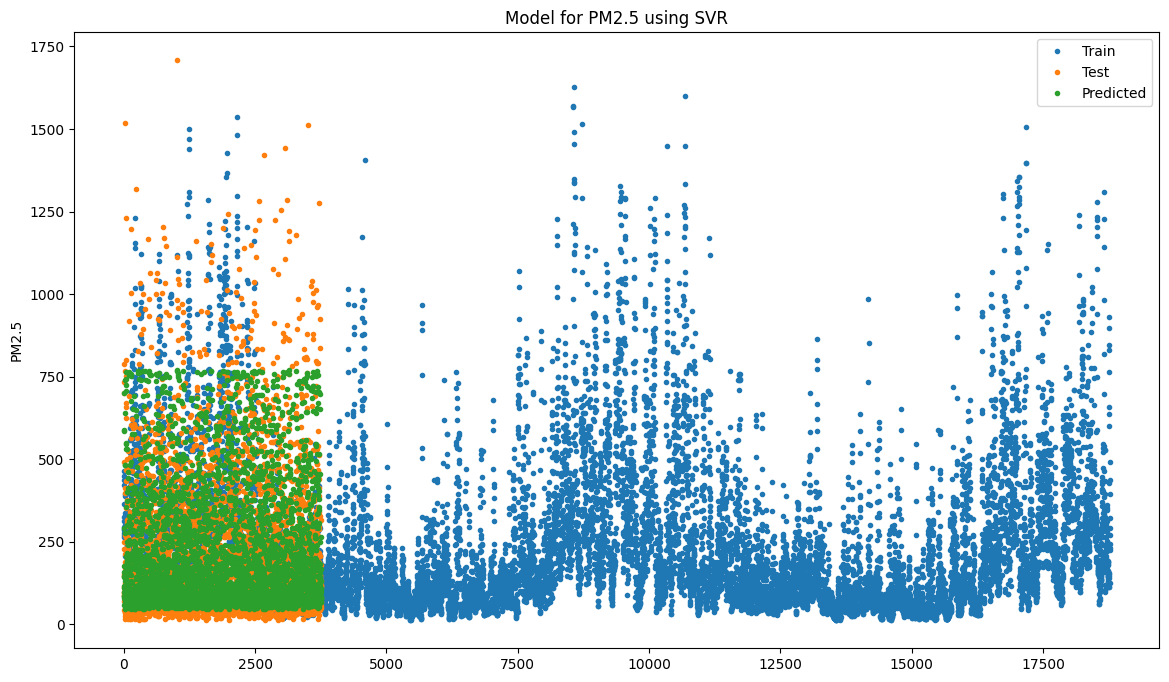

In [ ]:
# Plot the line plot of train, test, and predicted values
plt.figure(figsize=(14,8))
plt.plot(y_train, '.', label='Train')
plt.plot(y_test.values, '.', label='Test')
plt.plot(y_pred, '.', label='Predicted')

plt.ylabel('PM2.5')
plt.title('Model for PM2.5 using SVR')
plt.legend()
plt.show()

# Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# define model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
#model.add(Dropout(0.2))
model.add(Dense(1))

# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1, shuffle=False)

# make predictions on test data
y_pred = model.predict(X_test)


Epoch 1/100
235/235 [==============================] - 9s 15ms/step - loss: 102103.9062 - val_loss: 94955.8047
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 96063.8047 - val_loss: 89997.9922
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 91275.5000 - val_loss: 85541.2500
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 86930.1875 - val_loss: 81481.0625
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 82959.7031 - val_loss: 77772.0781
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 79327.2266 - val_loss: 74384.4609
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 76006.5547 - val_loss: 71295.0547
Epoch 8/100
235/235 [==============================] - 4s 17ms/step - loss: 72976.2188 - val_loss: 68484.3516
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 70218.0859 - val_loss: 65935.3125
Epoch 10/

In [ ]:
# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 1858.019875967793
Root Mean Squared Error: 43.10475467935983
Mean Absolute Error: 17.9722721766613
R-squared: 0.962659018427777


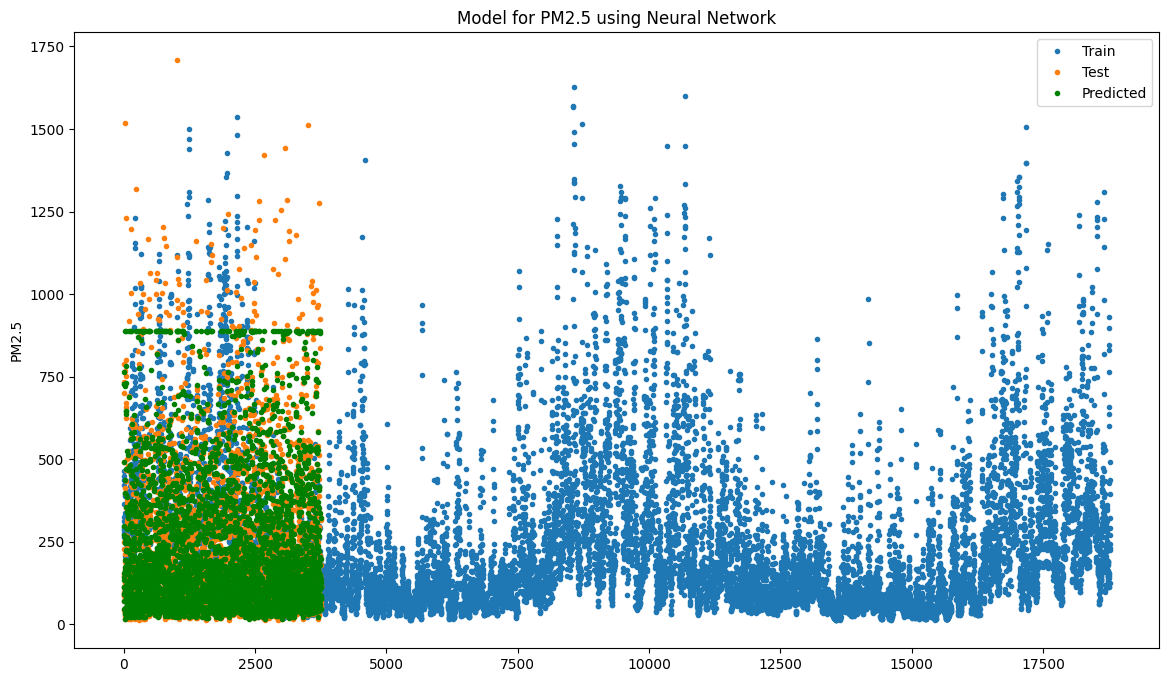

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot( y_train, '.', label='Train')
plt.plot( y_test.values, '.', label='Test')
plt.plot( y_pred, 'g.', label='Predicted')
plt.ylabel('PM2.5')
plt.title('Model for PM2.5 using Neural Network')
plt.legend()

#Comparison Study

In [ ]:
# Plot the scores
from tabulate import tabulate

# Initialize the regression models
svc = SVR()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()
nn = MLPRegressor()

# Train the regression models
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)
nn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_elastic = elastic.predict(X_test)
y_pred_nn = nn.predict(X_test)

# Compute the R-squared score for each model
r2_svc = r2_score(y_test, y_pred_svc)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_elastic = r2_score(y_test, y_pred_elastic)
r2_nn = r2_score(y_test, y_pred_nn)

models = ['SVR', 'Random Forest', 'Decision Tree', 'Lasso', 'Ridge', 'Elastic Net', 'Neural Network']
scores = [r2_svc, r2_rf, r2_dt, r2_lasso, r2_ridge, r2_elastic, r2_nn]

table = list(zip(models, scores))
headers = ["Model", "R2 Score"]

print(tabulate(table, headers=headers))


Model             R2 Score
--------------  ----------
SVR               0.828143
Random Forest     0.993847
Decision Tree     0.987283
Lasso             0.982245
Ridge             0.982238
Elastic Net       0.982243
Neural Network    0.985786


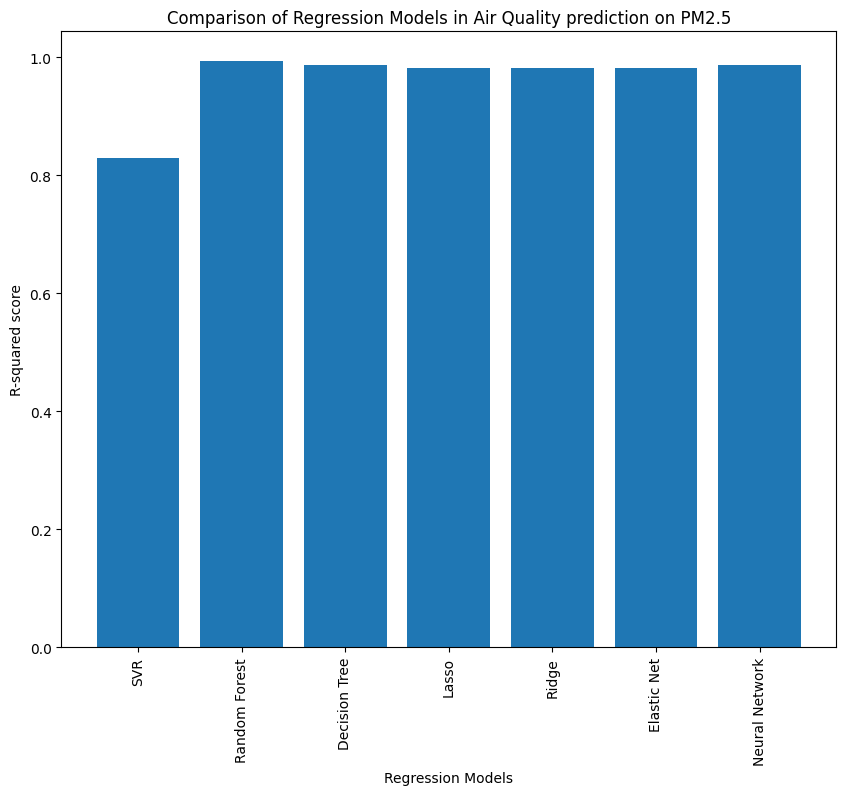

In [ ]:
plt.xticks(rotation=90);
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('R-squared score')
plt.title('Comparison of Regression Models in Air Quality prediction on PM2.5')
plt.show()